**Import** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import rpy2 #running embedded R

**Activate R Magic**

+ We need to code with R in our colab notebook
+ source_1: https://www.youtube.com/watch?v=5JT_Wi1RG3Q&t=214s
+ source_2: https://www.youtube.com/watch?v=Ri1MfaSlSW0
+ source_3: https://stackoverflow.com/questions/21838773/rpy2-import-is-not-working

In [ ]:
%load_ext rpy2.ipython #activate R magic

**Downloading CSV Files From Google Drive**

source: https://stackoverflow.com/questions/51505504/pandas-nesting-dataframes

source: https://www.youtube.com/watch?v=r0s4slGHwzE

In [ ]:
os.chdir(r'/content/drive/MyDrive/tsetmc - raw CSVs (20210209)')
from glob import glob
files = glob('*.csv')
#make a list of filenames with no '.' in them, just in case!
files_keys = []
for i in files:
  i = i.replace('.', '').replace('csv', '.csv')
  files_keys.append(i)

**Converting CSV Files Into Dataframes**

+ cleansing the coulumns names
+ Setting a date column for dfs

In [ ]:
files_values = []
for i in files:
    i = pd.read_csv(i, parse_dates= ["<DTYYYYMMDD>"])
    i.columns = ['TICKER', 'DTYYYYMMDD', 'FIRST', 'HIGH', 'LOW', 'CLOSE','VALUE', 'VOL', 'OPENINT', 'PER', 'OPEN', 'LAST']
    files_values.append(i)

**Setting Date Columns as Index**
+ now we can deal with dfs as time-series

In [ ]:
time_stamped_files = []
for i in files_values:
  i = i.set_index('DTYYYYMMDD')
  time_stamped_files.append(i)

**Check Files By Counting Number Of Rows**

+ files with low number of rows are suspicious of loss data set

In [ ]:
lens = []
for i in files_values:
  j = len(i.TICKER)
  lens.append(j)
lens_df = pd.DataFrame({'TICKER': files_keys, 'number of rows': lens})
sorted_lens_df = lens_df.sort_values(by=['number of rows'])
sorted_lens_df

**Look At A List Of Time_Series Calculations:**

+ WARNING: Do not run all of them at once!

In [ ]:
time_stamped_files[200]['CLOSE'].plot()
time_stamped_files[200]['HIGH'].plot()
time_stamped_files[200]['CLOSE']['2021-02'].plot() #plotting February close prices of MehrAyandegan
time_stamped_files[200].CLOSE.mean()
time_stamped_files[200].CLOSE['2021-02-09':'2021-02-01'].plot()
time_stamped_files[200].CLOSE.resample('M').mean() #monthly mean
time_stamped_files[200].CLOSE['2021':'2019'].resample('Q').mean() #quarterly mean
time_stamped_files[200].CLOSE['2020-01'].resample('W').mean().plot(kind='bar') #plotting weekly mean in bar chart

**Compare Three Stocks Monthly Average Price For 2020 (The Year of Big Crash)**
+ one of them began to drop one month earlier

Pakhsh.Alborz
Rahavard.PHARMA
KBC.Company


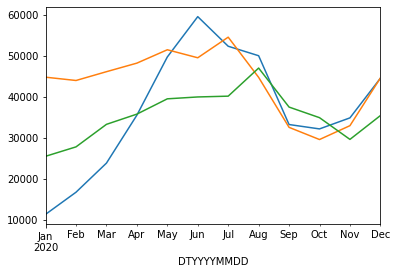

In [ ]:
time_stamped_files[196].CLOSE['2020'].resample('M').mean().plot()
time_stamped_files[197].CLOSE['2020'].resample('M').mean().plot()
time_stamped_files[200].CLOSE['2020'].resample('M').mean().plot()
print(time_stamped_files[196].TICKER[0])
print(time_stamped_files[197].TICKER[0])
print(time_stamped_files[200].TICKER[0])

**Calculate Returns with Pandas**

+source: https://stackoverflow.com/questions/47647410/pandas-pct-change-in-reverse

In [ ]:
returns = []
for i in time_stamped_files:
  j = i.CLOSE.pct_change(-1)
  returns.append(j)

**Last 50 Days Cross-Analysis with Numpy**

In [ ]:
close_std_50days = []
close_mean_50days = []
return_mean_50days = []

for i in time_stamped_files:
  j = np.std(i.CLOSE[0:51])
  k = np.mean(i.CLOSE[0:51])
  close_std_50days.append(j)
  close_mean_50days.append(k)

for i in returns:
  j = np.mean(i[0:51])
  return_mean_50days.append(j)

In [ ]:
summary_50days = pd.DataFrame({'TICKER': files_keys, 'price_mean': close_mean_50days, 'price_std': close_std_50days
                               , 'RETURN': return_mean_50days})
summary_50days.set_index('TICKER')

**Import Files into R**

In [1]:
%%R
install.packages('quantmod')
install.packages('xts')
install.packages('zoo')
install.packages('PerformanceAnalytics')
install.packages('PortfolioAnalytics')

UsageError: Cell magic `%%R` not found.


In [ ]:
files[5]

'S_Pars.Arian.Inv..csv'

In [ ]:
%%R
pars_arian <- read.csv('S_Pars.Arian.Inv..csv')
pars_arian

**Calculate Returns with R**
+ R libraries: "quantmod", "PerformanceAnalytics", "Portfolio Analytics"
+ 'xts'& 'zoo' are dependencies of quantmod, we install them just in case.

**Convert Pandas df to R df using rpy2**
+ source: https://stackoverflow.com/questions/22325353/converting-a-pandas-dataframe-to-r-dataframe-using-rpy2

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [ ]:
time_stamped_files[0